# we can apply machine learning models and ensemble model

###### lets apply Ml models k-nn,logistic regression,SVM classifier,Decision Tree Classifier
###### lets apply ensemble model Random forest
###### finally we choose model that works well with high performance and keep in production 

In [74]:
import numpy as np
import pandas as pd

# 1) Reading Data

In [75]:
X_train=pd.read_csv("train_for_modelling.csv") #reading the data
X_test=pd.read_csv("train_for_modelling.csv") 

In [76]:
y_test=np.array(X_test["loan_status"]) #creating the ouput
y_train=np.array(X_train["loan_status"])

In [77]:
y_test,y_train

(array([1, 1, 1, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 0, 0, 1], dtype=int64))

In [78]:
#dropping column from thr train and test dataset
X_test.drop(columns=["loan_status"],inplace=True)
X_train.drop(columns=["loan_status"],inplace=True)

In [79]:
X_train.head(1)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Combined_asset_value,p_0_education,p_1_education,p_0_self_employed,p_1_self_employed
0,1.682907,1.009337,1.625769,-0.859634,-0.187401,-0.273596,2.060092,0.077827,1.16172,0.601581,0.376179,0.623821,0.380726,0.619274


In [80]:
X_test.head(1)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Combined_asset_value,p_0_education,p_1_education,p_0_self_employed,p_1_self_employed
0,1.682907,1.009337,1.625769,-0.859634,-0.187401,-0.273596,2.060092,0.077827,1.16172,0.601581,0.376179,0.623821,0.380726,0.619274


# Modelling

# 1) K-nn

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
search_model=GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1,3,5,7,9,11,13,15,17,19,21]},scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             scoring='neg_log_loss')

In [83]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(KNeighborsClassifier(n_neighbors=13),
 {'n_neighbors': 13},
 -0.2881903755732182)

In [84]:
model=KNeighborsClassifier(n_neighbors=13,weights="distance") #if weights=uniform normal k-nn if weights=distance then weighted k-nn
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [85]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [86]:
confusion_matrix(y_test,y_pred) #tn,fp,fn,tp

array([[1295,    0],
       [   0, 2120]], dtype=int64)

# 2) Logistic Regresion

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
search_model=GridSearchCV(LogisticRegression(),{"C":[0.04,0.0001,0.05,0.08,0.005,0.03,0.09],"penalty":["l2"]},scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.04, 0.0001, 0.05, 0.08, 0.005, 0.03, 0.09],
                         'penalty': ['l2']},
             scoring='neg_log_loss')

In [89]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(LogisticRegression(C=0.09),
 {'C': 0.09, 'penalty': 'l2'},
 -0.23174597000421904)

In [90]:
model=LogisticRegression(C=0.09,penalty="l2") #if weights=uniform normal k-nn if weights=distance then weighted k-nn
model.fit(X_train,y_train)

LogisticRegression(C=0.09)

In [91]:
model.classes_,model.intercept_,model.coef_

(array([0, 1], dtype=int64),
 array([1.44586707]),
 array([[ 4.96363916e-03, -7.28949624e-01,  7.08433151e-01,
         -6.86357180e-01,  3.43836173e+00, -5.83567899e-02,
          5.27254826e-03, -6.17570327e-03, -1.93539932e-02,
          1.44948934e-01,  3.53534003e-04, -2.80871843e-04,
         -2.29537503e-03,  2.36803719e-03]]))

In [92]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[0.12926304, 0.87073696],
       [0.01834005, 0.98165995],
       [0.03059678, 0.96940322],
       ...,
       [0.92668619, 0.07331381],
       [0.46815536, 0.53184464],
       [0.00124631, 0.99875369]])

In [93]:
confusion_matrix(y_test,y_pred)

array([[1154,  141],
       [ 131, 1989]], dtype=int64)

# 3) Decision Trees

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
search_model=GridSearchCV(DecisionTreeClassifier(),{"max_depth":[2,4,6,8,10,12,14,15,18],"min_samples_split":[2,3,4,5,6,7,8,9,10],\
                                                "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]},scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 15, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_log_loss')

In [96]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(DecisionTreeClassifier(max_depth=2, min_samples_leaf=2),
 {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2},
 -0.07785368426058538)

In [97]:
model=DecisionTreeClassifier(max_depth=2,min_samples_split=2,min_samples_leaf=2)

In [98]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [99]:
model.classes_,model.n_classes_,model.max_features_,model.n_features_in_,model.n_outputs_,model.feature_importances_

(array([0, 1], dtype=int64),
 2,
 14,
 14,
 1,
 array([0.        , 0.        , 0.        , 0.08701031, 0.91025565,
        0.        , 0.        , 0.        , 0.        , 0.00273403,
        0.        , 0.        , 0.        , 0.        ]))

[Text(0.5, 0.8333333333333334, 'x[4] <= -0.295\ngini = 0.471\nsamples = 3415\nvalue = [1295, 2120]'),
 Text(0.25, 0.5, 'x[3] <= -1.035\ngini = 0.186\nsamples = 1432\nvalue = [1283, 149]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 283\nvalue = [134, 149]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1149\nvalue = [1149, 0]'),
 Text(0.75, 0.5, 'x[9] <= -1.634\ngini = 0.012\nsamples = 1983\nvalue = [12, 1971]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.01\nsamples = 1981\nvalue = [10, 1971]')]

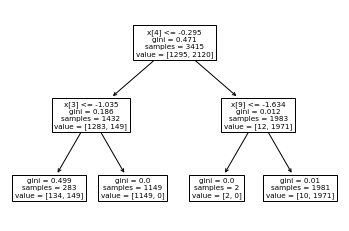

In [100]:
from sklearn import tree
tree.plot_tree(model)
#model.tree_

In [101]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[0.00504796, 0.99495204],
       [0.00504796, 0.99495204],
       [0.00504796, 0.99495204],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00504796, 0.99495204]])

In [102]:
confusion_matrix(y_test,y_pred)

array([[1151,  144],
       [   0, 2120]], dtype=int64)

In [103]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [104]:
tn,fp,fn,tp

(1151, 144, 0, 2120)

# Linear SVM

In [105]:
from sklearn.svm import SVC

In [106]:
search_model=GridSearchCV(SVC(kernel="linear",probability=True),{"C":[0.04,0.0001,0.05,0.08,0.005,0.03,0.09]},\
                          scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.04, 0.0001, 0.05, 0.08, 0.005, 0.03, 0.09]},
             scoring='neg_log_loss')

In [107]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(SVC(C=0.09, kernel='linear', probability=True),
 {'C': 0.09},
 -0.2360471427068511)

In [108]:
model=SVC(C=0.09,kernel="linear",probability=True)

In [109]:
model.fit(X_train,y_train)

SVC(C=0.09, kernel='linear', probability=True)

In [110]:
print(model.classes_)#number of classes it seen during fit
print(model.intercept_)# intercept term
print(model.coef_) #if kernel i linear it will fit on primal form as ell on dual form so coeffi of plane will eitsts
print(model.dual_coef_) # dual form alpha for each vector for supoort vector only alpha eists
print(model.support_vectors_) # all support vectors
print(model.n_support_)#number of uport vector for each class

[0 1]
[0.99114518]
[[ 0.03054255 -0.63386401  0.60600262 -0.3865144   2.61412857 -0.06414177
   0.00629181 -0.04596448 -0.01224979  0.17821661  0.00680135 -0.00680135
  -0.00703734  0.00703734]]
[[-0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.05929453 -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09       -0.09
  -0.09       -0.09       -0.09       -0.09       -0.09  

In [111]:
len(model.dual_coef_.ravel()) #alpha values total dataset length is 4k but we have support vectors of 837

837

In [112]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[8.80767117e-02, 9.11923288e-01],
       [7.08975804e-03, 9.92910242e-01],
       [1.67518308e-02, 9.83248169e-01],
       ...,
       [9.50922895e-01, 4.90771051e-02],
       [4.68532730e-01, 5.31467270e-01],
       [3.24056547e-07, 9.99999676e-01]])

In [113]:
confusion_matrix(y_test,y_pred)

array([[1194,  101],
       [ 140, 1980]], dtype=int64)

# Kernel SVM (RBF) acts like k-nn

In [114]:
from sklearn.svm import SVC

In [115]:
search_model=GridSearchCV(SVC(kernel="rbf",probability=True),{"C":[0.1,0.2,0.3,0.4,0.5,1,3,5,15,30,45,55,65]},\
                          scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 5, 15, 30, 45, 55,
                               65]},
             scoring='neg_log_loss')

In [116]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(SVC(C=45, probability=True), {'C': 45}, -0.1423231940300269)

In [117]:
model=SVC(C=55,kernel="rbf",probability=True)

In [118]:
model.fit(X_train,y_train)

SVC(C=55, probability=True)

In [119]:
print(model.classes_)#number of classes it seen during fit
print(model.intercept_)# intercept term
print(model.dual_coef_) # dual form alpha for each vector for supoort vector only alpha eists
print(model.support_vectors_) # all support vectors
print(model.n_support_)#number of uport vector for each class

[0 1]
[-0.60006121]
[[-24.01814994 -55.         -55.         -55.          -1.74098676
  -23.00023642 -11.20500439 -55.         -32.63596879 -20.69698043
  -55.         -55.         -19.6141155  -55.         -55.
   -5.298755   -25.47879255 -41.25615452  -6.41415405  -8.50206835
  -55.         -55.         -55.         -55.         -55.
  -12.0189416   -5.24516594 -55.         -13.73401325 -11.82818917
  -37.12697607 -44.11283048 -55.         -19.0001129   -1.0750193
  -55.          -0.76983322 -22.01130537 -55.         -11.25158695
   -0.89592874 -55.         -13.09370176 -34.50033225 -31.80793171
  -55.         -55.          -8.1693821  -21.40763427 -54.79159868
  -23.01421938 -25.55464992 -34.86320037 -13.50061598 -55.
  -55.          -9.67312472 -55.         -55.         -55.
  -55.         -55.         -55.         -55.         -55.
  -33.57382496 -55.          -7.4833455   -4.13802232 -55.
  -33.95447393  -2.57856329  -8.39353355  -0.52850383 -26.55333641
  -55.         -55.     

In [120]:
len(model.dual_coef_.ravel()) #alpha values total dataset length is 4k but we have support vectors of 458

458

In [121]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[1.55006824e-01, 8.44993176e-01],
       [1.01164033e-05, 9.99989884e-01],
       [3.38296929e-03, 9.96617031e-01],
       ...,
       [9.99983978e-01, 1.60224766e-05],
       [7.97417908e-01, 2.02582092e-01],
       [3.00000090e-14, 1.00000000e+00]])

In [122]:
confusion_matrix(y_test,y_pred)

array([[1265,   30],
       [  15, 2105]], dtype=int64)

# Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
search_model=GridSearchCV(RandomForestClassifier(),{"n_estimators":[5,7,10,13]},\
                          scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [5, 7, 10, 13]},
             scoring='neg_log_loss')

In [125]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(RandomForestClassifier(n_estimators=10),
 {'n_estimators': 10},
 -0.12654290741884205)

In [126]:
model=RandomForestClassifier(n_estimators=13)

In [127]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [128]:
print(model.estimator_)
print(model.estimators_)
print(model.classes_) 
print(model.n_classes_) # number of classes it seen during fit
print(model.feature_importances_)
print(model.n_outputs_)

DecisionTreeClassifier()
[DecisionTreeClassifier(max_features='sqrt', random_state=1995042351), DecisionTreeClassifier(max_features='sqrt', random_state=273118176), DecisionTreeClassifier(max_features='sqrt', random_state=1568132571), DecisionTreeClassifier(max_features='sqrt', random_state=1054843004), DecisionTreeClassifier(max_features='sqrt', random_state=794644081), DecisionTreeClassifier(max_features='sqrt', random_state=1146405079), DecisionTreeClassifier(max_features='sqrt', random_state=1859028964), DecisionTreeClassifier(max_features='sqrt', random_state=879042996), DecisionTreeClassifier(max_features='sqrt', random_state=1168071709), DecisionTreeClassifier(max_features='sqrt', random_state=1884451534), DecisionTreeClassifier(max_features='sqrt', random_state=1213854052), DecisionTreeClassifier(max_features='sqrt', random_state=1467207441), DecisionTreeClassifier(max_features='sqrt', random_state=541596686)]
[0 1]
2
[0.0064019  0.0182206  0.02493685 0.05657215 0.78918898 0.02

In [129]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.07692308, 0.92307692]])

In [130]:
confusion_matrix(y_test,y_pred)

array([[1295,    0],
       [   0, 2120]], dtype=int64)

# GBDT

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
search_model=GridSearchCV(GradientBoostingClassifier(),{"n_estimators":[5,7,10,13],"learning_rate":[0.1,0.3,0.5,0.7,0.9]},\
                          scoring="neg_log_loss",cv=3)
search_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'n_estimators': [5, 7, 10, 13]},
             scoring='neg_log_loss')

In [133]:
search_model.best_estimator_,search_model.best_params_,search_model.best_score_

(GradientBoostingClassifier(learning_rate=0.5, n_estimators=13),
 {'learning_rate': 0.5, 'n_estimators': 13},
 -0.06695597398217458)

In [134]:
model=GradientBoostingClassifier(n_estimators=13,learning_rate=0.5)

In [135]:
model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=13)

In [136]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[0.00134782, 0.99865218],
       [0.00134782, 0.99865218],
       [0.00239044, 0.99760956],
       ...,
       [0.99560733, 0.00439267],
       [0.99441521, 0.00558479],
       [0.00381129, 0.99618871]])

In [137]:
confusion_matrix(y_test,y_pred)

array([[1273,   22],
       [  13, 2107]], dtype=int64)

# Conclusion 

##### RF and K-nn and GBDT and SVM with rbf kernel works better

#### Random forest and K-nn works very very well on data

# lets dump the best model so that we can use while taking to production

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
import pickle

In [139]:
model=RandomForestClassifier(n_estimators=13)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [140]:
joblib.dump(model,"RFmodel.pkl")
#clf=pickle.load("RFmodel.pkl")
#y_test_pred=clf.predict(X_test)

['RFmodel.pkl']